In [1]:
import ROOT
ROOT.gROOT.Macro("rootlogon.C")


Welcome to JupyROOT 6.10/04


0L

In [2]:
import os
import sys

sys.path.append( os.path.abspath('.'))

from HistDriver import *

In [3]:


from Unfolder import *




ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
ROOT.gStyle.SetLabelFont(43,"XYZ")
ROOT.gStyle.SetLabelSize(22,"XYZ")

ROOT.gSystem.Load("RooUnfold/libRooUnfold")

lumi = 2.3e3

infile = "2DData_expunc.root"



In [4]:
pythia = ROOT.TFile(infile)

In [5]:
#softdropstr = "_softdrop"
softdropstr = ""

scalePtBins = True

# All jet energy uncertainty sources
allJecUncSrcNames = [
    "AbsoluteStat","AbsoluteScale","AbsoluteFlavMap","AbsoluteMPFBias",
    "Fragmentation",
    "SinglePionECAL","SinglePionHCAL",
    "FlavorQCD",
    "TimeEta","TimePt",
    "RelativeJEREC1","RelativeJEREC2","RelativeJERHF","RelativePtBB","RelativePtEC1","RelativePtEC2","RelativePtHF","RelativeFSR","RelativeStatFSR","RelativeStatEC","RelativeStatHF",
    "PileUpDataMC","PileUpPtRef","PileUpPtBB","PileUpPtEC1","PileUpPtEC2","PileUpPtHF","PileUpMuZero","PileUpEnvelope",
    "SubTotalPileUp","SubTotalRelative","SubTotalPt","SubTotalScale","SubTotalAbsolute","SubTotalMC",
    "Total","TotalNoFlavor","TotalNoTime","TotalNoFlavorNoTime",
    "FlavorZJet","FlavorPhotonJet","FlavorPureGluon","FlavorPureQuark","FlavorPureCharm","FlavorPureBottom",
    "TimeRunA","TimeRunB","TimeRunC","TimeRunD",
    "CorrelationGroupMPFInSitu","CorrelationGroupIntercalibration","CorrelationGroupbJES","CorrelationGroupFlavor","CorrelationGroupUncorrelated",
]
allJecUncSrcs = dict(
    zip( allJecUncSrcNames, [i for i in xrange( len(allJecUncSrcNames) )] )
)

# Jet energy uncertainty sources to use
jecUncSrcs = [
    "Total",
    "SubTotalPileUp",
    "SubTotalRelative",
    "SubTotalAbsolute",
    "Fragmentation",
    "SinglePionECAL","SinglePionHCAL",
    "FlavorQCD"    
]


leg = ROOT.TLegend(0.2, 0.7, 0.6, 0.85)
leg.SetNColumns(2)
leg.SetFillColor(0)
leg.SetBorderSize(0)

driver = HistDriver()

In [6]:
nom = pythia.Get("2d_response" + softdropstr).Hreco()
driver.normalizeHist( nom,  normalizeUnity=True, divideByBinWidths=True, scalePtBins = scalePtBins )
jecsrcs = []


for i,jec in enumerate(jecUncSrcs): 
    jecsrcs.append( [pythia.Get('2d_response' + softdropstr + '_jecsrc'+str(allJecUncSrcs[jec])+'up').Hreco(), 
                     pythia.Get('2d_response' + softdropstr + '_jecsrc'+str(allJecUncSrcs[jec])+'dn').Hreco()] )

    driver.normalizeHist( jecsrcs[i][0],  normalizeUnity=True, divideByBinWidths=True, scalePtBins = scalePtBins )
    driver.normalizeHist( jecsrcs[i][1],  normalizeUnity=True, divideByBinWidths=True, scalePtBins = scalePtBins )

    jecsrcs[i][0].Add( nom, -1.0 )
    jecsrcs[i][1].Add( nom, -1.0 )
    jecsrcs[i][0].Divide( nom )
    jecsrcs[i][1].Divide( nom )
    

Info in <TCanvas::Print>: png file jec_comparison_1_normalized.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_1_normalized.pdf has been created
Info in <TCanvas::Print>: png file jec_comparison_2_normalized.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_2_normalized.pdf has been created
Info in <TCanvas::Print>: png file jec_comparison_3_normalized.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_3_normalized.pdf has been created
Info in <TCanvas::Print>: png file jec_comparison_4_normalized.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_4_normalized.pdf has been created
Info in <TCanvas::Print>: png file jec_comparison_5_normalized.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_5_normalized.pdf has been created
Info in <TCanvas::Print>: png file jec_comparison_6_normalized.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_6_normalized.pdf has been 

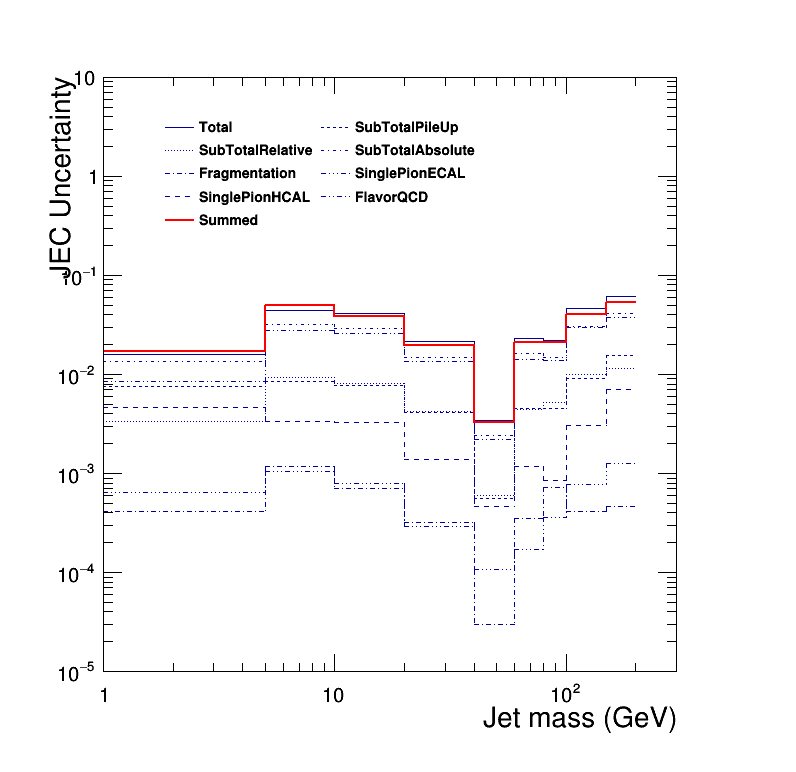

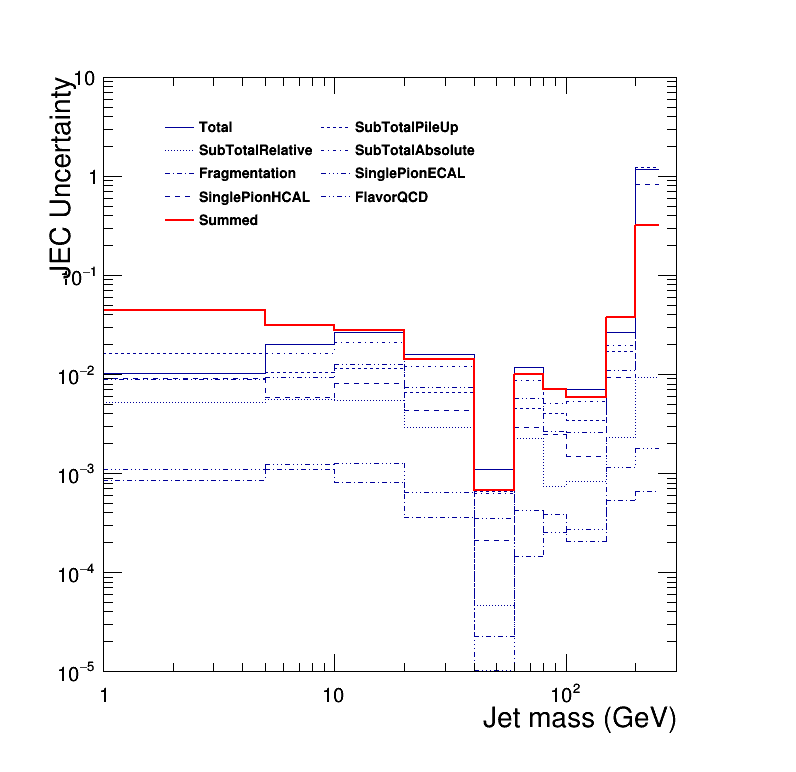

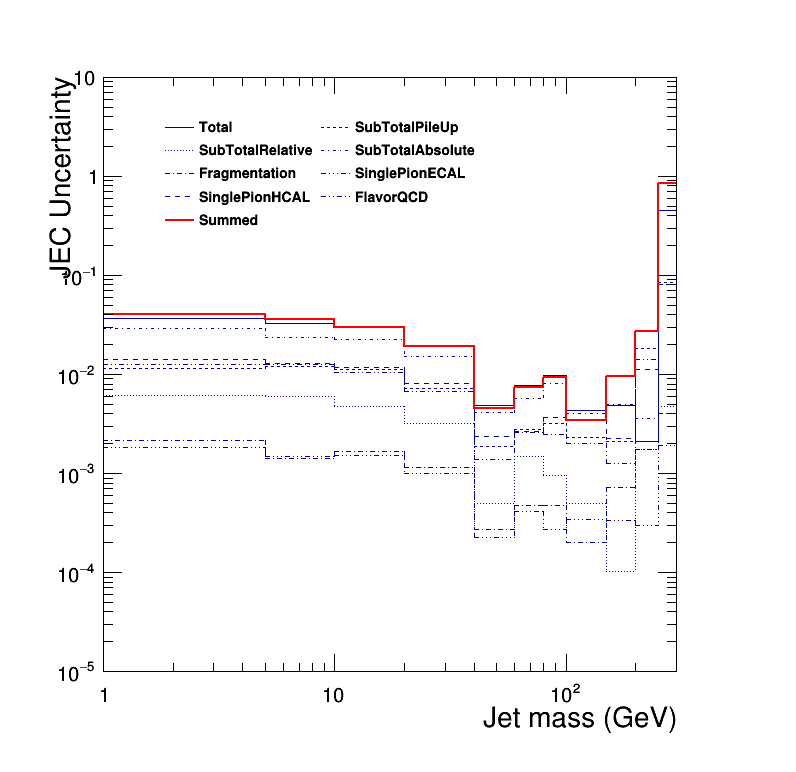

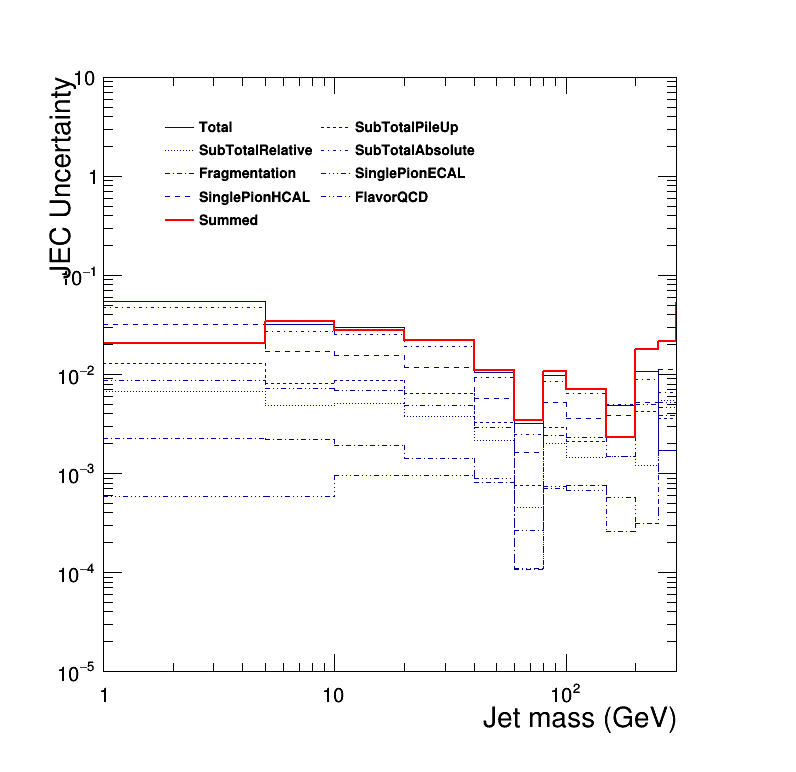

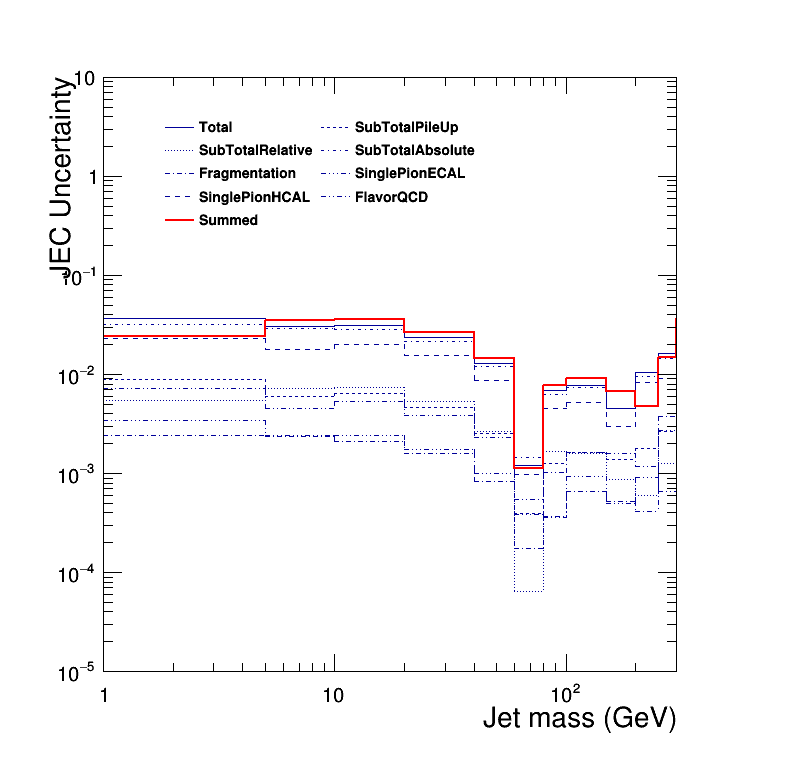

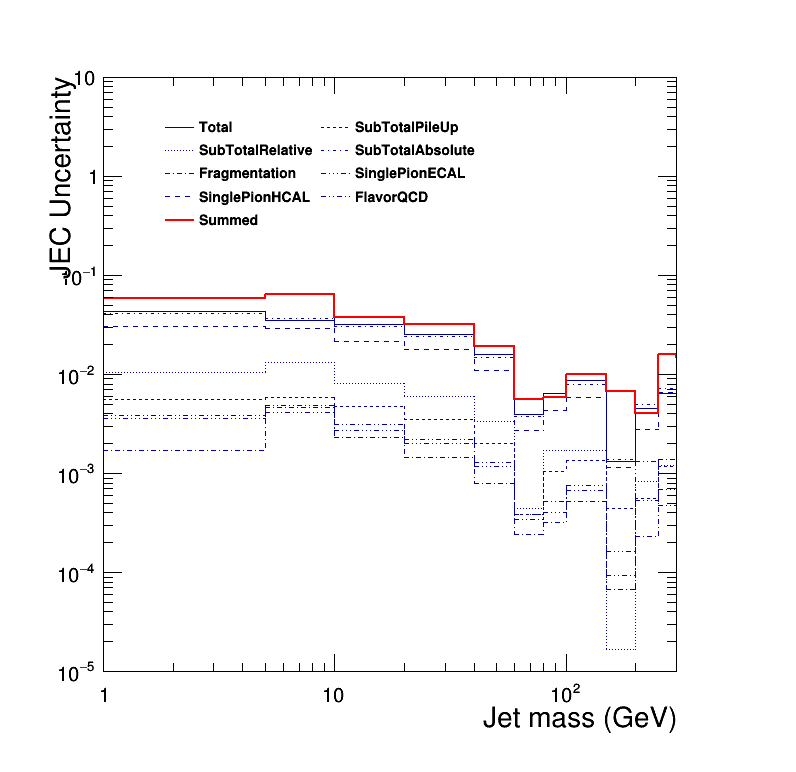

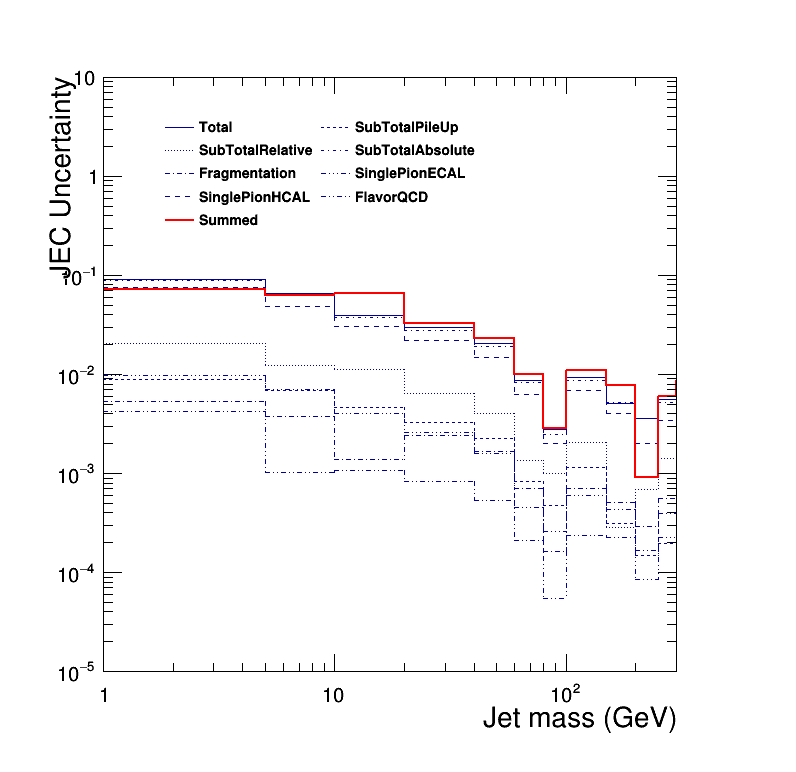

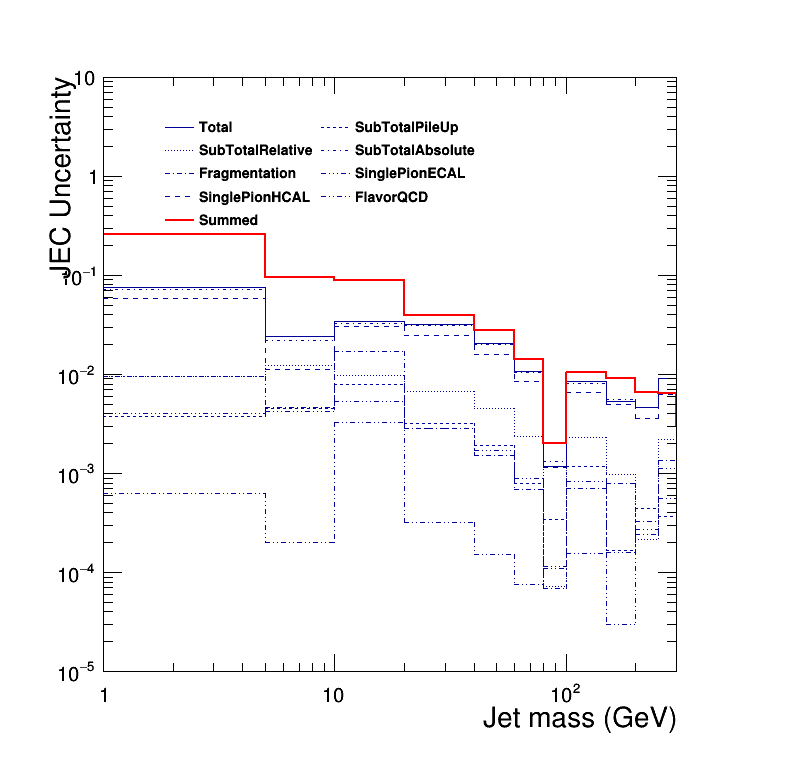

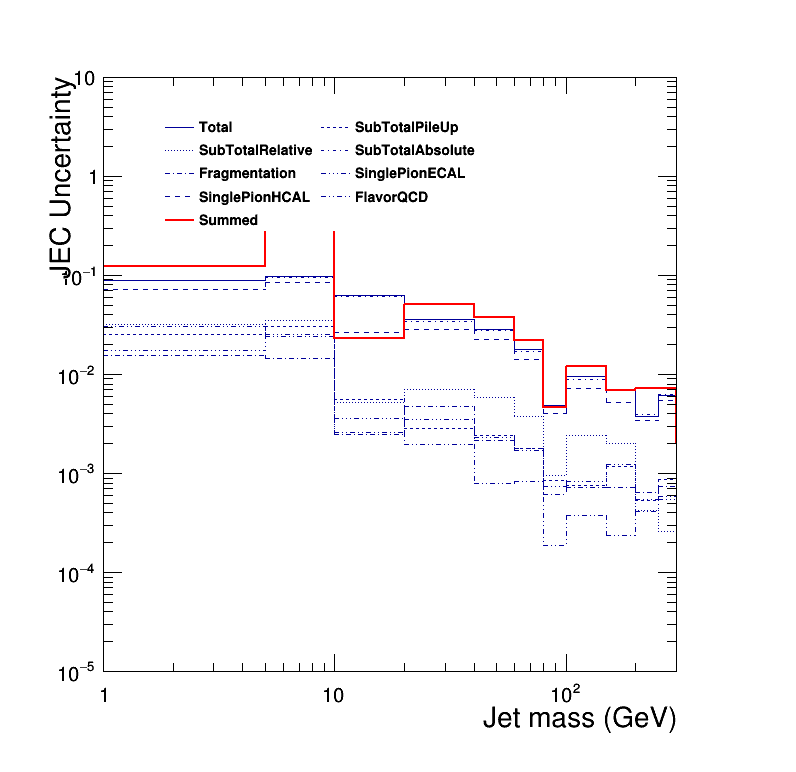

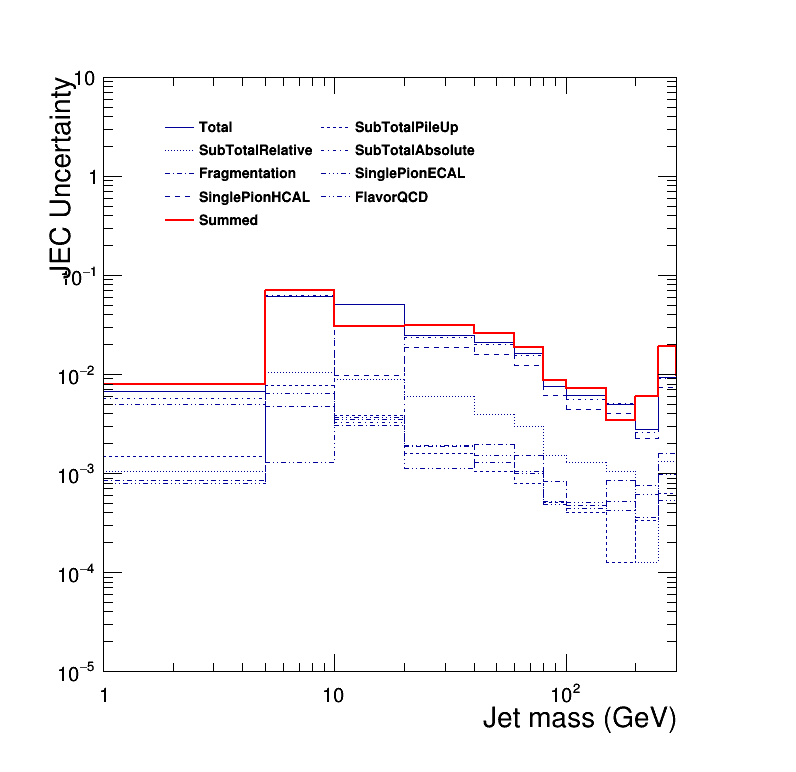

In [7]:


hists = []
canvs = []
stacks = []
for ipt in xrange(1,11) : 

    projsup = []
    projsdn = []

    for i,jec in enumerate(jecUncSrcs): 
        ptproj = jecsrcs[i][0].ProjectionX("projyup"+str(ipt) + "_" +str(i), ipt, ipt)
        ptproj.SetLineStyle( i + 1)
        projsup.append( ptproj )
        if ipt == 1: 
            leg.AddEntry( ptproj, jec, 'l')

    for i,jec in enumerate(jecUncSrcs):      
        ptproj = jecsrcs[i][1].ProjectionX("projydn"+str(ipt) + "_" +str(i), ipt, ipt)
        ptproj.SetLineStyle( i + 1)
        projsdn.append( ptproj )

    projtot = projsup[1].Clone('projtot'+str(ipt))
    for ix in xrange(projtot.GetNbinsX()+1):        
        projtot.SetBinContent(ix,0.0)
    for ijec in projsup[2:]:
        for ix in xrange(projtot.GetNbinsX()+1):
            val1 = projtot.GetBinContent(ix)
            val2 = ijec.GetBinContent(ix)
            val = math.sqrt( val1**2 + val2**2)
            projtot.SetBinContent(ix,val)
    projsup.append( projtot )
    projtot.SetLineStyle(1)
    projtot.SetLineWidth(2)
    projtot.SetLineColor(2)
    if ipt == 1 : 
        leg.AddEntry( projtot, 'Summed', 'l')


    if 'softdrop' in softdropstr : 
        hup = ROOT.THStack("hup" + str(ipt), ";Groomed jet mass (GeV);JEC Uncertainty")
        hdn = ROOT.THStack("hdn" + str(ipt), ";Groomed jet mass (GeV);JEC Uncertainty")
    else : 
        hup = ROOT.THStack("hup" + str(ipt), ";Jet mass (GeV);JEC Uncertainty")
        hdn = ROOT.THStack("hdn" + str(ipt), ";Jet mass (GeV);JEC Uncertainty")    

    for i,jec in enumerate(jecUncSrcs): 
        setToAverage( projsup[i], projsup[i], projsdn[i] )
        ensureAbs( projsup[i] )
        hup.Add(projsup[i])    

    hup.Add( projtot )

    cup = ROOT.TCanvas("cup" + str(ipt), "cup" + str(ipt), 800,800)

    hup.Draw("nostack hist ][")
    hup.SetMinimum(1e-5)
    hup.SetMaximum(10)
    hup.GetXaxis().SetRangeUser(0,300)

    leg.Draw()

    cup.SetLogy()
    cup.SetLogx()

    cup.Draw()
    
    
    if scalePtBins: 
        cup.Print('jec_comparison_' + str(ipt) + '_normalized' + softdropstr + '.png', 'png')
        cup.Print('jec_comparison_' + str(ipt) + '_normalized' + softdropstr + '.pdf', 'pdf')
    else : 
        cup.Print('jec_comparison_' + str(ipt) + '_absolute' + softdropstr + '.png', 'png')
        cup.Print('jec_comparison_' + str(ipt) + '_absolute' + softdropstr + '.pdf', 'pdf')   
        
        
    hists.append([projsup, projsdn])
    canvs.append(cup)
    stacks.append([hup,hdn])